In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
data = iris.data
target = iris.target

In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
cond = (target != 2)

In [6]:
data = data[cond]
target = target[cond]

In [8]:
data.shape

(100, 4)

In [9]:
# 获取混淆矩阵, 计算各种评估指标.
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_ = knn.predict(X_test)

In [15]:
confusion_matrix(y_test, y_)

array([[17,  0],
       [ 0, 13]], dtype=int64)

In [19]:
X =  np.hstack((data,np.random.randn(100, 800)))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_ = knn.predict(X_test)

In [23]:
confusion_matrix(y_test, y_)

array([[ 9,  4],
       [ 7, 10]], dtype=int64)

In [26]:
pd.crosstab(index=y_, columns=y_test, rownames=['预测'], colnames=['真实'])

真实,0,1
预测,,
0,9,7
1,4,10


In [30]:
# 默认的sklearn的混淆矩阵, 行是真实结果, 列是预测结果. 使用的时候注意进行转置
cm = confusion_matrix(y_test, y_).T

In [33]:
cm

array([[ 9,  7],
       [ 4, 10]], dtype=int64)

In [34]:
cm[1, 0]

4

In [36]:
# 精确率  precision
precision = cm[1, 1] / (cm[1, 1] + cm[1, 0])
precision

0.7142857142857143

In [38]:
# 召回率 recall
recall = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall

0.5882352941176471

In [40]:
# f值
f = 2 * precision * recall / (precision + recall)
f

0.6451612903225806

In [42]:
# 准确率 accuracy
accuracy = (cm[0 ,0] + cm[1, 1]) / cm.sum()
accuracy

0.6333333333333333

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [44]:
precision_score(y_test, y_)

0.7142857142857143

In [45]:
recall_score(y_test, y_)

0.5882352941176471

In [46]:
f1_score(y_test, y_)

0.6451612903225806

In [47]:
accuracy_score(y_test, y_)

0.6333333333333333

In [50]:
y_proba = knn.predict_proba(X_test)

In [53]:
y_

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1])

In [54]:
y_proba[:, 1]

array([0. , 0.8, 0.8, 0.4, 0.2, 0.2, 0.4, 0.6, 0.2, 0.4, 0.4, 0. , 0.4,
       0.6, 0.2, 0.8, 0.6, 0.4, 0.6, 0.4, 0.8, 0.6, 0.8, 0.4, 0.2, 0.6,
       0.6, 0.2, 0.6, 0.8])

In [56]:
from sklearn.metrics import roc_curve, auc

In [57]:
# 先获取到roc曲线的x,y轴的数据
# 传的是预测的结果
fpr, tpr, threshold = roc_curve(y_test, y_)
display(fpr, tpr, threshold)

array([0.        , 0.30769231, 1.        ])

array([0.        , 0.58823529, 1.        ])

array([2, 1, 0])

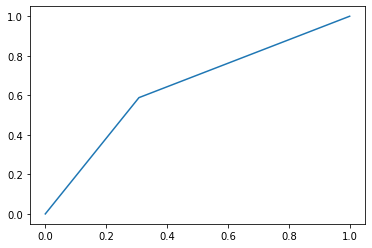

In [58]:
plt.plot(fpr, tpr)

In [59]:
auc(fpr, tpr)

0.6402714932126697

In [62]:
# 传属于正例的概率
fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])
print(fpr, tpr, threshold)

[0.         0.07692308 0.53846154 0.92307692 1.        ] [0.         0.29411765 0.88235294 0.94117647 1.        ] [1.8 0.8 0.4 0.2 0. ]


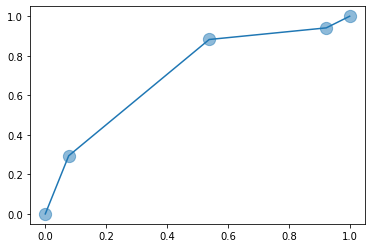

In [63]:
plt.plot(fpr, tpr)
plt.scatter(fpr, tpr, s=150, alpha=0.5)

In [64]:
auc(fpr, tpr)

0.7081447963800905

In [65]:
from sklearn.model_selection import StratifiedKFold

In [66]:
skf = StratifiedKFold(n_splits=6, shuffle=True)

In [67]:
from sklearn.linear_model import LogisticRegression

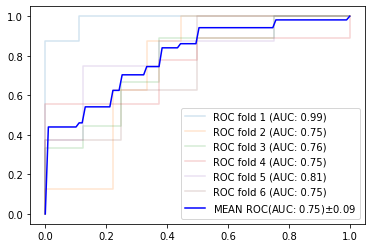

In [80]:
n = 0
# 认为设定了一个for_mean, 我们只要找到和fpr_mean对应的tpr_mean即可
fpr_mean = np.linspace(0, 1, 100)
tpr_means = []
aucs = []
for train, test in skf.split(X, target):
    # 取数据
    X_train = X[train]
    y_train = target[train]
    X_test = X[test]
    y_test = target[test]
    
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    y_proba = logistic.predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
    tpr_mean = np.interp(fpr_mean, fpr, tpr)
    tpr_means.append(tpr_mean)
#     print(fpr)
#     print(tpr)
#     print(thresholds)
#     print(' - - - - - -- - -- - -- - - - -- --')
    auc_ = auc(fpr, tpr)
    aucs.append(auc_)
    n += 1
    plt.plot(fpr, tpr, label=f'ROC fold {n} (AUC: {auc_:.2f})', alpha=0.2)
    
    
# 求最终的tpr_mean
tpr_mean = np.array(tpr_means).mean(axis=0)
# 为了保证从0开始, 把第一个赋值为0
tpr_mean[0] = 0
tpr_mean[-1] = 1
# 求平均的auc
auc_mean = auc(fpr_mean, tpr_mean)
auc_std = np.array(aucs).std()


plt.plot(fpr_mean, tpr_mean, label=f'MEAN ROC(AUC: {auc_:.2f})$\pm${auc_std:.2f}', c='b')
plt.legend()

In [ ]:
# 线性插值
# 根据已有数据的关系, 推断出位置数据
# 已知fpr 和 tpr 有某种关系, 求在当前关系下, 和fpr_mean对应的tpr_mean


$\pm$